# Demonstrating Overfitting and the Importance of Feature Selection

This notebook illustrates the phenomenon of overfitting in statistical models, particularly in the context of regression analysis. Overfitting occurs when a model learns not only the underlying pattern but also the noise in the training data, leading to poor performance on new, unseen data. This is often a result of using excessively complex models or including irrelevant features in the model. 

We will explore how different regression models respond to a mix of relevant and irrelevant features and demonstrate the utility of techniques like Ridge Regression for mitigating overfitting.


#### Import Libraries

In [1]:
# Importing necessary libraries for data handling, mathematical operations, and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

#### Generate Synthetic Dataset

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)
n_samples = 100

# Generating a simple linear relationship (relevant feature)
X = np.random.rand(n_samples, 1) * 10  # Feature values between 0 and 10
y = 3 * X.squeeze() + 5 + np.random.randn(n_samples)  # Linear relationship with Gaussian noise

# Adding multiple irrelevant features (noise features)
X_noise = np.random.rand(n_samples, 10)
X_overfit = np.hstack([X, X_noise])

# Creating a DataFrame to facilitate data operations
df = pd.DataFrame(X_overfit, columns=[f'feature_{i}' for i in range(11)])
df['target'] = y

df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,3.745401,0.794811,0.502637,0.576904,0.492518,0.195243,0.722452,0.280772,0.024316,0.645472,0.177111,16.323251
1,9.507143,0.940459,0.953929,0.914864,0.370159,0.015457,0.928319,0.428184,0.966655,0.963620,0.853009,33.222422
2,7.319939,0.294449,0.385098,0.851137,0.316922,0.169493,0.556801,0.936155,0.696030,0.570061,0.097176,27.051579
3,5.986585,0.615007,0.990054,0.140084,0.518330,0.877373,0.740769,0.697016,0.702484,0.359491,0.293592,20.972186
4,1.560186,0.809361,0.810113,0.867072,0.913241,0.511342,0.501516,0.798295,0.649964,0.701967,0.795793,9.460887


#### Data Preparation

In [11]:
# Splitting the full dataset into a 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and test sets including labels with titles
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (80, 11)
y_train shape: (80,)
X_test shape: (20, 11)
y_test shape: (20,)


#### Model Training

In [4]:
# Training different models to compare performance
model_overfit = LinearRegression().fit(X_train, y_train)
model_simple = LinearRegression().fit(X_train[:, 0].reshape(-1, 1), y_train)
model_ridge = Ridge(alpha=1.0).fit(X_train, y_train)

#### Model Evaluation

In [5]:
# Predicting and evaluating the models using mean squared error (MSE)
# Overfitted Model Evaluation
y_train_pred_overfit = model_overfit.predict(X_train)
y_test_pred_overfit = model_overfit.predict(X_test)
mse_train_overfit = mean_squared_error(y_train, y_train_pred_overfit)
mse_test_overfit = mean_squared_error(y_test, y_test_pred_overfit)

# Simple Model Evaluation
y_train_pred_simple = model_simple.predict(X_train[:, 0].reshape(-1, 1))
y_test_pred_simple = model_simple.predict(X_test[:, 0].reshape(-1, 1))
mse_train_simple = mean_squared_error(y_train, y_train_pred_simple)
mse_test_simple = mean_squared_error(y_test, y_test_pred_simple)

# Ridge Model Evaluation
y_train_pred_ridge = model_ridge.predict(X_train)
y_test_pred_ridge = model_ridge.predict(X_test)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Printing the MSE results for each model
print(f'Overfitted Model - Training MSE: {mse_train_overfit:.2f}, Testing MSE: {mse_test_overfit:.2f}')
print(f'Simple Model - Training MSE: {mse_train_simple:.2f}, Testing MSE: {mse_test_simple:.2f}')
print(f'Ridge Model - Training MSE: {mse_train_ridge:.2f}, Testing MSE: {mse_test_ridge:.2f}')

Overfitted Model - Training MSE: 0.65, Testing MSE: 0.80
Simple Model - Training MSE: 0.85, Testing MSE: 0.65
Ridge Model - Training MSE: 0.66, Testing MSE: 0.74


#### Visualization

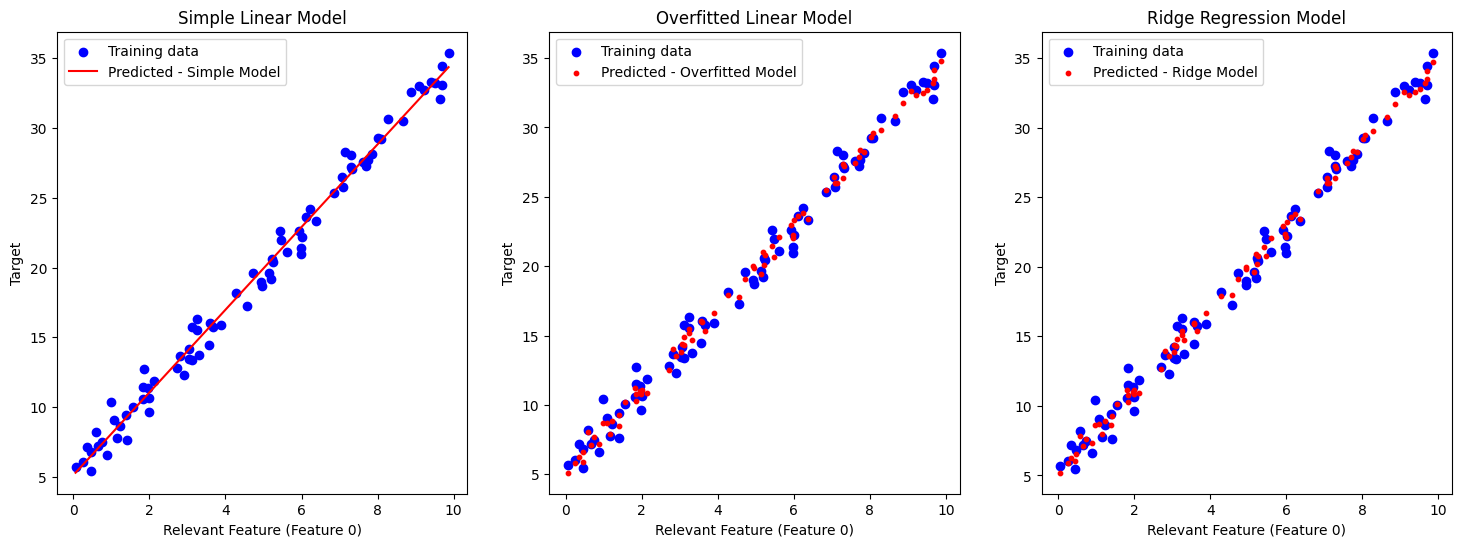

In [6]:
# Setting up the plot dimensions and titles for visual comparisons
plt.figure(figsize=(18, 6))

# Plot for Simple Linear Regression Model
plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training data')
plt.plot(np.sort(X_train[:, 0], axis=0), np.sort(y_train_pred_simple), color='red', label='Predicted - Simple Model')
plt.title('Simple Linear Model')
plt.xlabel('Relevant Feature (Feature 0)')
plt.ylabel('Target')
plt.legend()

# Plot for Overfitted Linear Regression Model
plt.subplot(1, 3, 2)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training data')
plt.scatter(X_train[:, 0], y_train_pred_overfit, color='red', s=10, label='Predicted - Overfitted Model')
plt.title('Overfitted Linear Model')
plt.xlabel('Relevant Feature (Feature 0)')
plt.ylabel('Target')
plt.legend()

# Plot for Ridge Regression Model
plt.subplot(1, 3, 3)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training data')
plt.scatter(X_train[:, 0], y_train_pred_ridge, color='red', s=10, label='Predicted - Ridge Model')
plt.title('Ridge Regression Model')
plt.xlabel('Relevant Feature (Feature 0)')
plt.ylabel('Target')
plt.legend()

# Displaying the plots
plt.show()

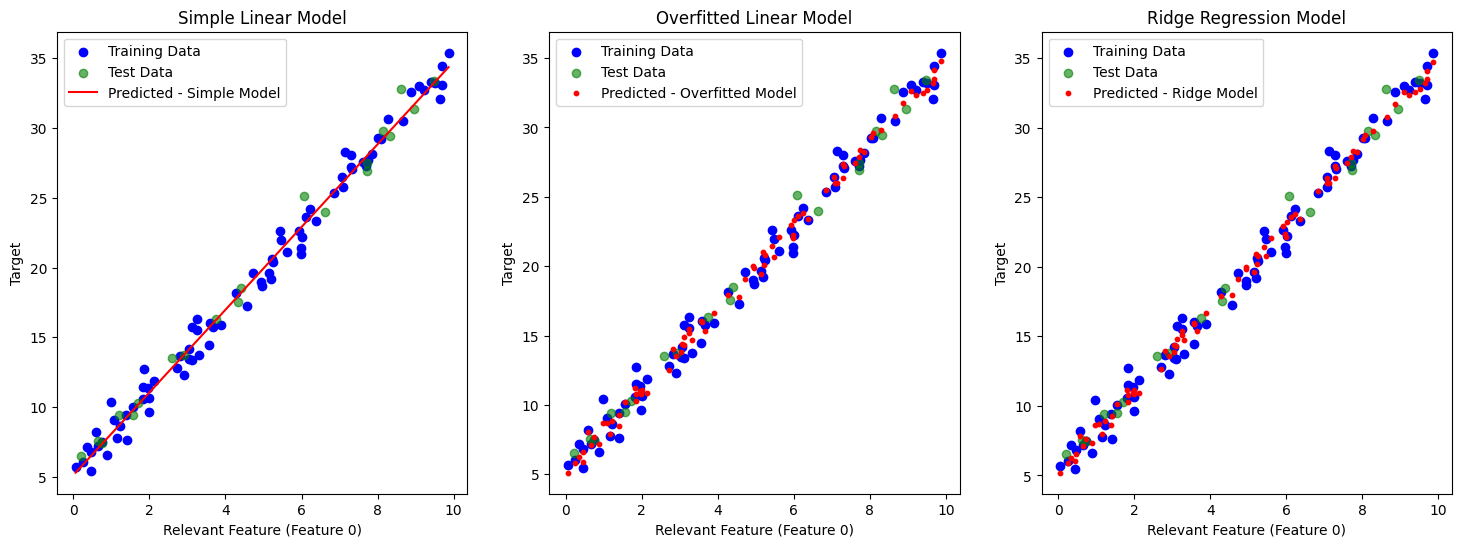

In [7]:
# Setting up the plot dimensions and titles for visual comparisons
plt.figure(figsize=(18, 6))

# Plot for Simple Linear Regression Model
plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data')
plt.scatter(X_test[:, 0], y_test, color='green', label='Test Data', alpha=0.6)
plt.plot(np.sort(X_train[:, 0], axis=0), np.sort(y_train_pred_simple), color='red', label='Predicted - Simple Model')
plt.title('Simple Linear Model')
plt.xlabel('Relevant Feature (Feature 0)')
plt.ylabel('Target')
plt.legend()

# Plot for Overfitted Linear Regression Model
plt.subplot(1, 3, 2)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data')
plt.scatter(X_test[:, 0], y_test, color='green', label='Test Data', alpha=0.6)
plt.scatter(X_train[:, 0], y_train_pred_overfit, color='red', s=10, label='Predicted - Overfitted Model')
plt.title('Overfitted Linear Model')
plt.xlabel('Relevant Feature (Feature 0)')
plt.ylabel('Target')
plt.legend()

# Plot for Ridge Regression Model
plt.subplot(1, 3, 3)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data')
plt.scatter(X_test[:, 0], y_test, color='green', label='Test Data', alpha=0.6)
plt.scatter(X_train[:, 0], y_train_pred_ridge, color='red', s=10, label='Predicted - Ridge Model')
plt.title('Ridge Regression Model')
plt.xlabel('Relevant Feature (Feature 0)')
plt.ylabel('Target')
plt.legend()

# Displaying the plots
plt.show()
